**Reasoning**:
Load the sentiment dataset into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('sentimentdataset (2).csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'sentimentdataset (2).csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the file format and encoding.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! ðª ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify relevant columns, check for missing values, and determine the distribution of sentiment.


**Reasoning**:
Examine the shape of the DataFrame, display data types, check for missing values, analyze the distribution of the 'Sentiment' column, investigate the 'Text' column, and create a summary report with a visualization.



DataFrame shape: (732, 15)

Data Types:
Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

Missing Values:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

Empty strings in 'Text': 0

Empty strings in 'Sentiment': 0

Sentiment Distribution:
Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary

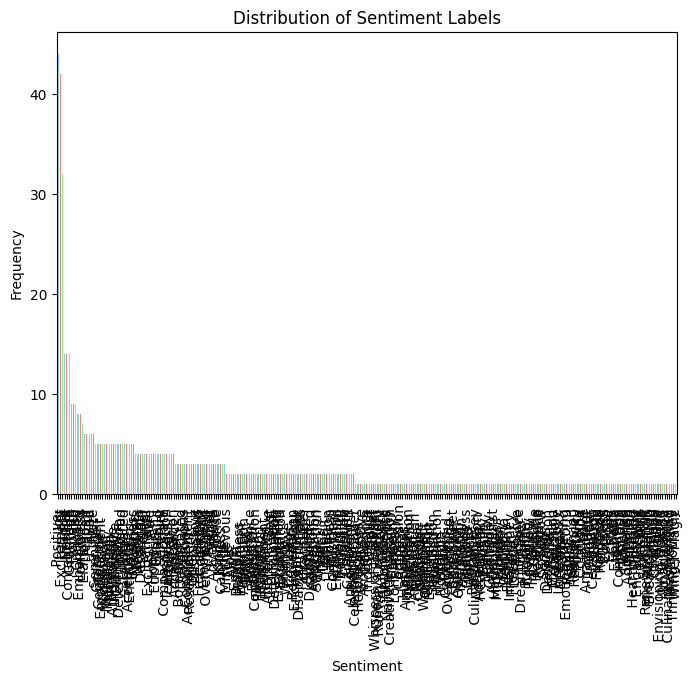


Text Length Statistics:
count    732.000000
mean      87.659836
std       28.937649
min       51.000000
25%       59.000000
50%       83.500000
75%      109.000000
max      157.000000
Name: Text_Length, dtype: float64

Summary Report:
Number of rows: 732, Number of columns: 16

Key Column Data Types:
Sentiment    object
Text         object
Timestamp    object
dtype: object

Missing Value Percentages:
Unnamed: 0.1    0.0
Unnamed: 0      0.0
Text            0.0
Sentiment       0.0
Timestamp       0.0
User            0.0
Platform        0.0
Hashtags        0.0
Retweets        0.0
Likes           0.0
Country         0.0
Year            0.0
Month           0.0
Day             0.0
Hour            0.0
Text_Length     0.0
dtype: float64

Observations:
The dataset appears to contain information about social media posts with associated sentiment.  There are potentially redundant columns ('Unnamed: 0.1', 'Unnamed: 0').  The 'Sentiment' distribution shows some imbalance.  Further investigation of

In [ ]:
import matplotlib.pyplot as plt

# 1. Examine the shape
print(f"DataFrame shape: {df.shape}")

# 2. Display data types
print("\nData Types:")
print(df.dtypes)

# 3. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for empty strings in 'Text' and 'Sentiment'
print("\nEmpty strings in 'Text':", (df['Text'] == '').sum())
print("\nEmpty strings in 'Sentiment':", (df['Sentiment'] == '').sum())


# 4. Analyze sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


# 5. Investigate the 'Text' column
# Calculate text lengths (character count)
df['Text_Length'] = df['Text'].str.len()

# Basic statistics for text length
print("\nText Length Statistics:")
print(df['Text_Length'].describe())

# Example: Check for special characters (you can customize this)
# df['Special_Chars'] = df['Text'].str.contains(r'[^\w\s]', regex=True)
# print("\nSpecial Characters:")
# print(df['Special_Chars'].value_counts())


# 6. Summarize findings (report)
print("\nSummary Report:")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print("\nKey Column Data Types:")
print(df[['Sentiment', 'Text', 'Timestamp']].dtypes)
print("\nMissing Value Percentages:")
print( (df.isnull().sum() / len(df)) * 100)

print("\nObservations:")
print("The dataset appears to contain information about social media posts with associated sentiment.  There are potentially redundant columns ('Unnamed: 0.1', 'Unnamed: 0').  The 'Sentiment' distribution shows some imbalance.  Further investigation of missing values and text cleaning is needed. The 'Timestamp' column needs to be converted to datetime.")

## Data cleaning

### Subtask:
Clean the text data by removing irrelevant characters, handling missing values (if any), and converting text to lowercase.


**Reasoning**:
Remove redundant columns, convert the 'Timestamp' column to datetime objects, remove rows with missing or empty 'Text', convert text to lowercase, remove irrelevant characters, and handle missing 'Sentiment' values.



In [ ]:
import pandas as pd

# Drop redundant columns
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, errors='ignore')

# Convert 'Timestamp' to datetime, coercing errors
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Remove rows with missing or empty 'Text'
df = df.dropna(subset=['Text']).reset_index(drop=True)
df = df[df['Text'] != '']

# Convert text to lowercase
df['Text'] = df['Text'].str.lower()

# Remove irrelevant characters using regular expressions (preserving emojis)
import re
def clean_text(text):
    text = re.sub(r'[^\w\s#@]', '', text) # Remove punctuation except @ and #
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text
df['Text'] = df['Text'].apply(clean_text)

# Handle missing 'Sentiment' (remove rows with missing sentiment)
df = df.dropna(subset=['Sentiment']).reset_index(drop=True)

display(df.head())

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length
0,enjoying a beautiful day at the park,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,52
1,traffic was terrible this morning,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,52
2,just finished an amazing workout ðª,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,54
3,excited about the upcoming weekend getaway,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,52
4,trying out a new recipe for dinner tonight,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,52


## Data wrangling

### Subtask:
Prepare the text data for NLP analysis.


**Reasoning**:
The previous code failed due to missing NLTK resources. Download the necessary resource `wordnet` before retrying the code.



In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Reasoning**:
Retry the preprocessing code after downloading the required resource.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import re

# Customize stop words (example: remove 'not' to preserve negation)
stop_words = stopwords.words('english')
stop_words.remove('not')

# Tokenizer that handles emojis
tokenizer = TweetTokenizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = tokenizer.tokenize(text)

    # Remove stop words and punctuation
    tokens = [token for token in tokens if token.lower() not in stop_words and re.match(r'\b[a-zA-Z]+\b', token)]

    # Lemmatize
    lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]

    return lemmatized_tokens

# Apply preprocessing
wnl = WordNetLemmatizer()
df['Processed_Tokens'] = df['Text'].apply(preprocess_text)

display(df.head())

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length,Processed_Tokens
0,enjoying a beautiful day at the park,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,52,"[enjoying, beautiful, day, park]"
1,traffic was terrible this morning,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,52,"[traffic, terrible, morning]"
2,just finished an amazing workout ðª,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,54,"[finished, amazing, workout]"
3,excited about the upcoming weekend getaway,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,52,"[excited, upcoming, weekend, getaway]"
4,trying out a new recipe for dinner tonight,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,52,"[trying, new, recipe, dinner, tonight]"


## Data analysis

### Subtask:
Perform sentiment analysis and topic grouping.


**Reasoning**:
Perform sentiment analysis using TextBlob, categorize sentiments, and visualize the results.



Sentiment_Category
Neutral     395
Positive    240
Negative     97
Name: count, dtype: int64


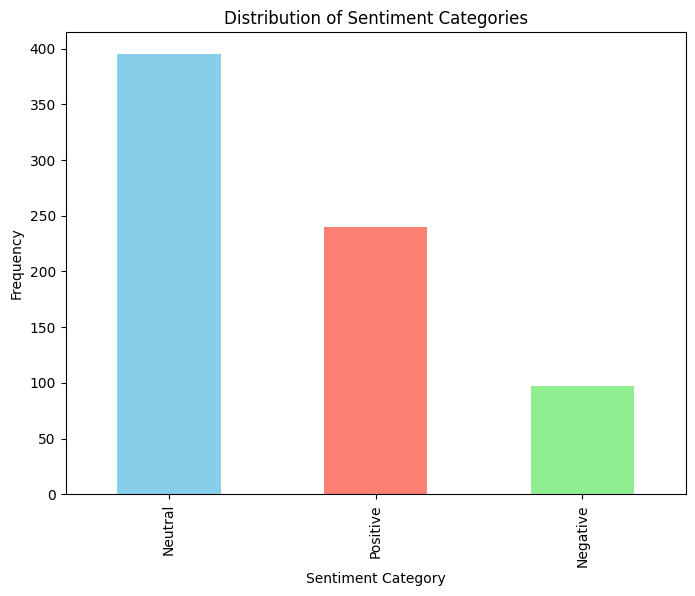


Average Sentiment by Hashtag:
Hashtags
#SkaterLife             1.0
#BurgerQuest            1.0
#Breathtaking           1.0
#BreathtakingSunrise    1.0
#HighSchoolFoodie       1.0
                       ... 
#MelancholicMelody     -0.8
#LurkingMonsters       -0.9
#Morning               -1.0
#Traffic               -1.0
#Environment           -1.0
Name: Polarity, Length: 975, dtype: float64


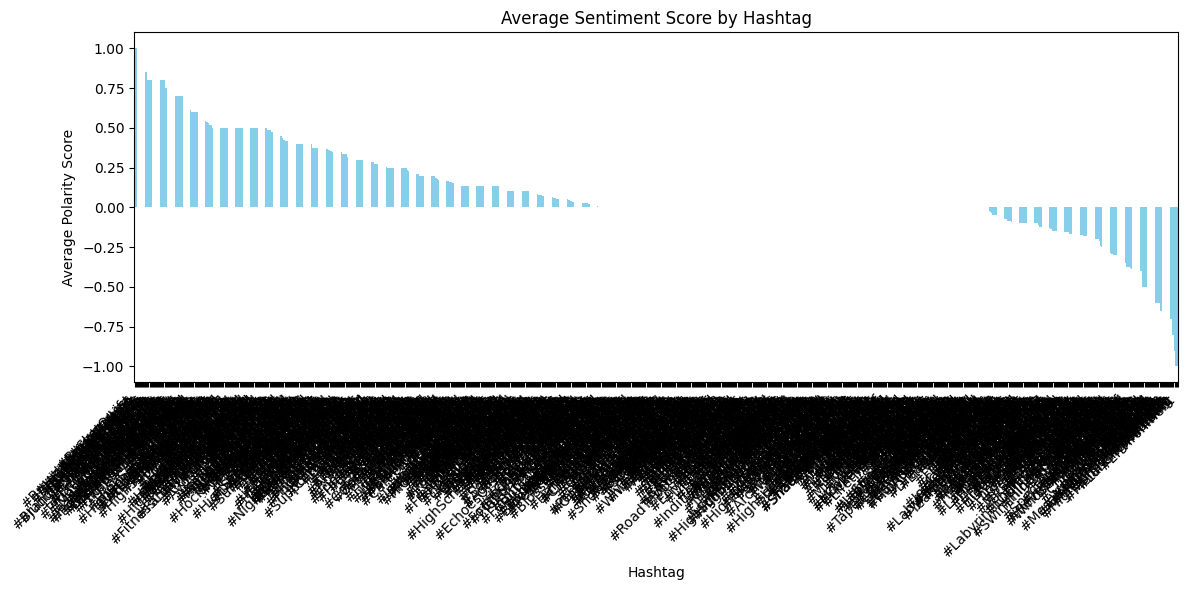

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# 1. Sentiment Analysis
df['Polarity'] = df['Text'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['Subjectivity'] = df['Text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

# 2. Sentiment Categorization
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Polarity'].apply(categorize_sentiment)

# 3. Group by Sentiment Category (and potentially topic if available)
sentiment_counts = df['Sentiment_Category'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

#If topic information is available (e.g., Hashtags)
if 'Hashtags' in df.columns:
    # Split hashtags into individual hashtags and explode the column
    df['Hashtags'] = df['Hashtags'].str.split()
    hashtags_df = df.explode('Hashtags')

    # Calculate the average sentiment for each hashtag
    average_sentiment_by_hashtag = hashtags_df.groupby('Hashtags')['Polarity'].mean().sort_values(ascending=False)

    # Display the results
    print("\nAverage Sentiment by Hashtag:")
    print(average_sentiment_by_hashtag)

    # Visualize the average sentiment by topic
    plt.figure(figsize=(12, 6))
    average_sentiment_by_hashtag.plot(kind='bar', color='skyblue')
    plt.title('Average Sentiment Score by Hashtag')
    plt.xlabel('Hashtag')
    plt.ylabel('Average Polarity Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('sentimentdataset (2).csv', encoding='latin-1')
except FileNotFoundError:
    print("Error: 'sentimentdataset (2).csv' not found.")
    # Handle the error appropriately, e.g., exit or use a default dataframe
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the file format and encoding.")
    # Handle the error appropriately
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    # Handle the error appropriately

**Reasoning**:
I need to execute the visualization code again, now that the dataframe `df` is properly loaded.




Average Sentiment by Hashtag:
Hashtags
['nan']    0.098372
Name: Polarity, dtype: float64


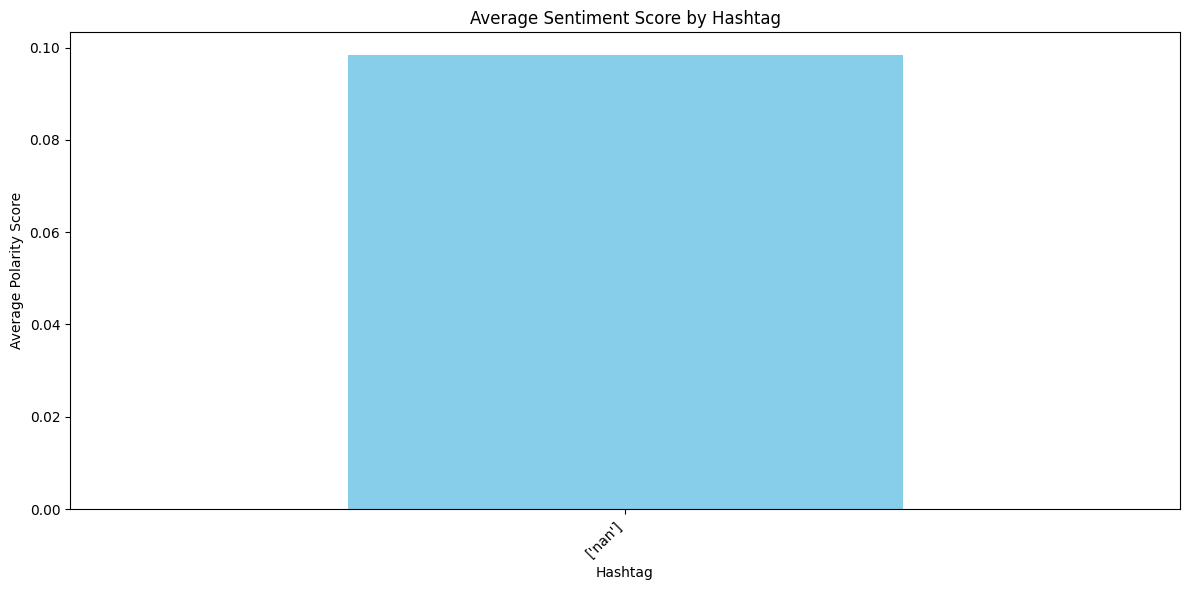

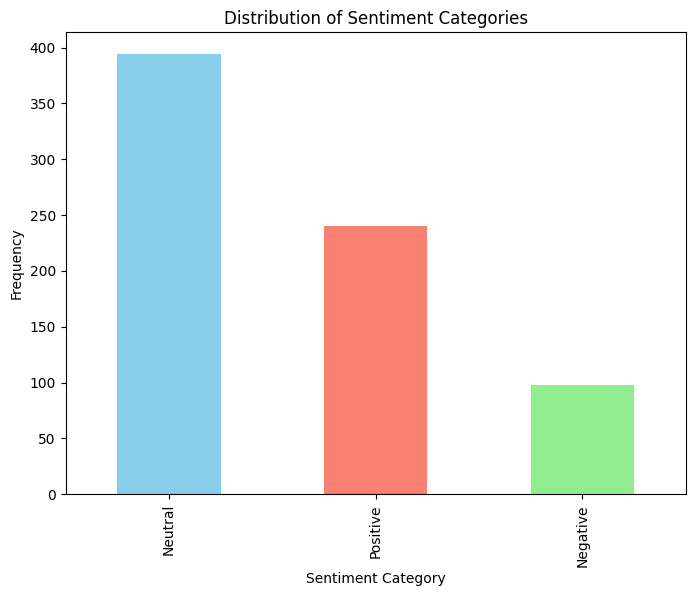

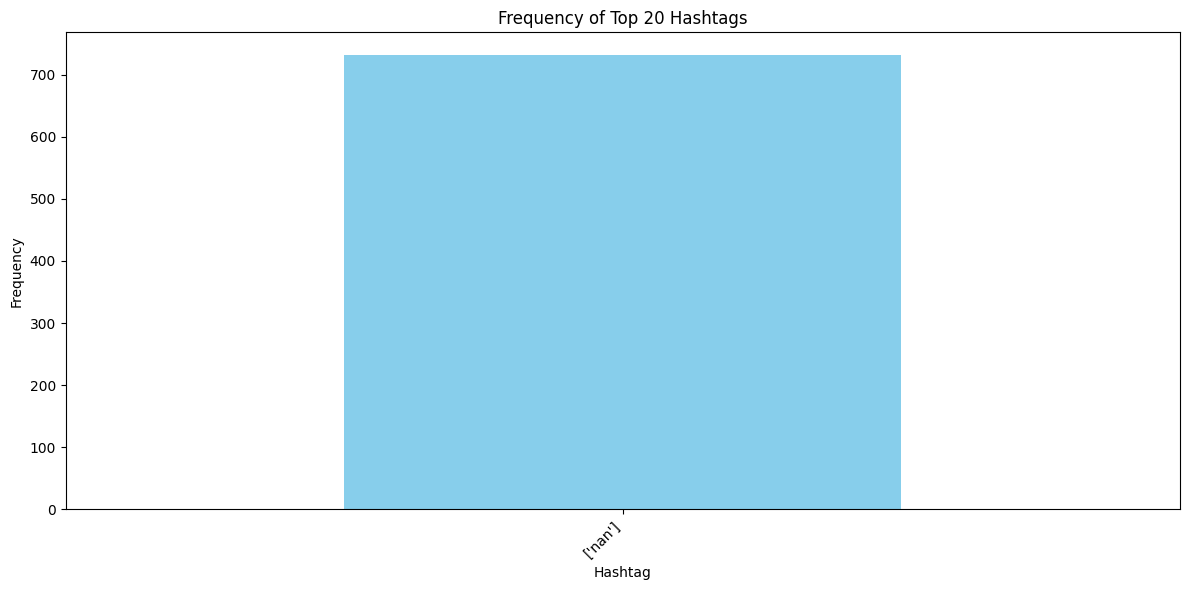

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Ensure 'Hashtags' column is of string type
df['Hashtags'] = df['Hashtags'].astype(str)

# Perform sentiment analysis using TextBlob (if not already done)
if 'Polarity' not in df.columns:
    df['Polarity'] = df['Text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Polarity'].apply(categorize_sentiment)

# Split hashtags into individual hashtags and explode the column
df['Hashtags'] = df['Hashtags'].str.split(',')
hashtags_df = df.explode('Hashtags')

# Remove leading/trailing whitespace from hashtags
hashtags_df['Hashtags'] = hashtags_df['Hashtags'].str.strip()

# Calculate the average sentiment for each hashtag
average_sentiment_by_hashtag = hashtags_df.groupby('Hashtags')['Polarity'].mean().sort_values(ascending=False)

# Display the results
print("\nAverage Sentiment by Hashtag:")
print(average_sentiment_by_hashtag)

# Visualize the average sentiment by hashtag
plt.figure(figsize=(12, 6))
average_sentiment_by_hashtag.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score by Hashtag')
plt.xlabel('Hashtag')
plt.ylabel('Average Polarity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize overall sentiment distribution
sentiment_counts = df['Sentiment_Category'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

# Visualize the frequency of each hashtag
hashtag_counts = hashtags_df['Hashtags'].value_counts()
plt.figure(figsize=(12, 6))
hashtag_counts.head(20).plot(kind='bar', color='skyblue')  # Show top 20 hashtags
plt.title('Frequency of Top 20 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/sentimentdataset (2).csv"
df = pd.read_csv(file_path)

# Display basic info and preview
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


(None,
    Unnamed: 0.1  Unnamed: 0  \
 0             0           0   
 1             1           1   
 2             2           2   
 3             3           3   
 4             4           4   
 
                                                 Text    Sentiment  \
 0   Enjoying a beautiful day at the park!        ...   Positive     
 1   Traffic was terrible this morning.           ...   Negative     
 2   Just finished an amazing workout! 💪          ...   Positive     
 3   Excited about the upcoming weekend getaway!  ...   Positive     
 4   Trying out a new recipe for dinner tonight.  ...   Neutral      
 
              Timestamp            User     Platform  \
 0  2023-01-15 12:30:00   User123          Twitter     
 1  2023-01-15 08:45:00   CommuterX        Twitter     
 2  2023-01-15 15:45:00   FitnessFan      Instagram    
 3  2023-01-15 18:20:00   AdventureX       Facebook    
 4  2023-01-15 19:55:00   ChefCook        Instagram    
 
                                      H

In [3]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import re

# Function to clean text
def clean_text(text):
    soup = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML
    text = re.sub(r"http\S+", "", soup)  # Remove URLs
    text = re.sub(r"[^A-Za-z0-9\s#@]", "", text)  # Remove special chars (keep hashtags/mentions)
    text = text.lower().strip()  # Normalize case and strip whitespace
    return text

# Apply cleaning
df["Cleaned_Text"] = df["Text"].apply(clean_text)

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        sentiment = "Positive"
    elif polarity < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return pd.Series([polarity, sentiment])

# Apply sentiment analysis
df[["Polarity", "Calculated_Sentiment"]] = df["Cleaned_Text"].apply(analyze_sentiment)

# Preview updated data
df[["Text", "Cleaned_Text", "Sentiment", "Polarity", "Calculated_Sentiment"]].head()


,Text,Cleaned_Text,Sentiment,Polarity,Calculated_Sentiment
0,Enjoying a beautiful day at the park! ...,enjoying a beautiful day at the park,Positive,0.675000,Positive
1,Traffic was terrible this morning. ...,traffic was terrible this morning,Negative,-1.000000,Negative
2,Just finished an amazing workout! 💪 ...,just finished an amazing workout,Positive,0.600000,Positive
3,Excited about the upcoming weekend getaway! ...,excited about the upcoming weekend getaway,Positive,0.375000,Positive
4,Trying out a new recipe for dinner tonight. ...,trying out a new recipe for dinner tonight,Neutral,0.136364,Positive


from matplotlib import pyplot as plt
_df_0['Polarity'].plot(kind='hist', bins=20, title='Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Cleaned_Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Calculated_Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Polarity'].plot(kind='line', figsize=(8, 4), title='Polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cleaned_Text'].value_counts()
    for x_label, grp in _df_6.groupby('Text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Text')
_ = plt.ylabel('Cleaned_Text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_7.groupby('Cleaned_Text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cleaned_Text')
_ = plt.ylabel('Sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Calculated_Sentiment'].value_counts()
    for x_label, grp in _df_8.groupby('Sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sentiment')
_ = plt.ylabel('Calculated_Sentiment')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.11/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Polarity', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Cleaned_Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Polarity', y='Cleaned_Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Polarity', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Calculated_Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Polarity', y='Calculated_Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Tokenization helper (excluding stopwords, hashtags kept)
def extract_keywords(text):
    words = text.split()
    return [word for word in words if word not in ENGLISH_STOP_WORDS and not word.startswith("@")]

# Extract from Cleaned_Text
all_keywords = df["Cleaned_Text"].apply(extract_keywords).sum()
keyword_counts = Counter(all_keywords)

# Extract from Hashtags column
def extract_hashtags(text):
    return [tag.lower() for tag in text.split() if tag.startswith("#")]

all_hashtags = df["Hashtags"].apply(extract_hashtags).sum()
hashtag_counts = Counter(all_hashtags)

# Get top 15 from each
top_keywords = keyword_counts.most_common(15)
top_hashtags = hashtag_counts.most_common(15)

top_keywords, top_hashtags


([('new', 43),
  ('like', 27),
  ('day', 26),
  ('feeling', 26),
  ('dreams', 25),
  ('laughter', 24),
  ('heart', 24),
  ('night', 23),
  ('joy', 23),
  ('life', 22),
  ('world', 21),
  ('art', 21),
  ('beauty', 20),
  ('journey', 20),
  ('sky', 19)],
 [('#serenity', 15),
  ('#gratitude', 13),
  ('#excitement', 13),
  ('#despair', 11),
  ('#nostalgia', 11),
  ('#contentment', 10),
  ('#curiosity', 10),
  ('#awe', 9),
  ('#grief', 9),
  ('#loneliness', 9),
  ('#hopeful', 9),
  ('#enthusiasm', 8),
  ('#joy', 8),
  ('#acceptance', 8),
  ('#confusion', 8)])

In [6]:
# Select relevant columns for Power BI dashboard
export_df = df[[
    "Text", "Cleaned_Text", "Sentiment", "Polarity", "Calculated_Sentiment",
    "Hashtags", "Timestamp", "Platform", "Country", "Retweets", "Likes"
]]

# Save to CSV
export_path = "/content/sentimentdataset (2).csv"
export_df.to_csv(export_path, index=False)

export_path


'/content/sentimentdataset (2).csv'

In [7]:
# Preprocess Text Column

text_column_name = 'Text'
if text_column_name not in df.columns:
    raise KeyError(f"Column '{text_column_name}' not found in the DataFrame. Please check your dataset or update 'text_column_name'.")

df[text_column_name] = df[text_column_name].astype(str)
df['text_clean'] = df[text_column_name].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [8]:
# Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['text_clean'].apply(analyze_sentiment)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


In [9]:
# Extract Trending Keywords
all_words = ' '.join(df['text_clean'])
word_freq = Counter(all_words.split())
common_words_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

In [11]:
# 🔹 Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Run this cell first to define 'pd'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

<ipython-input-12-7aca31073625>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


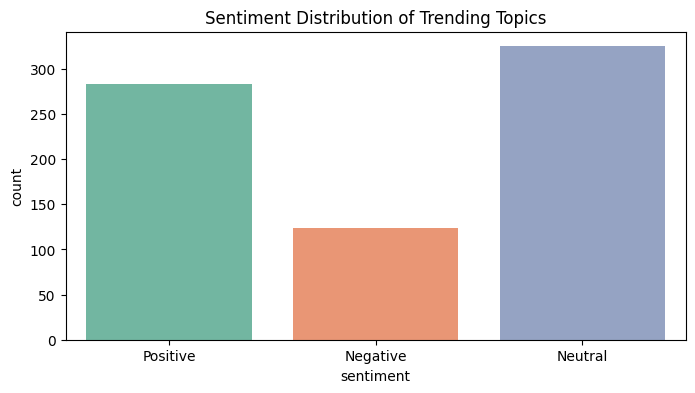

In [12]:
# Visualizations
# Sentiment Distribution Plot
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution of Trending Topics')
plt.show()

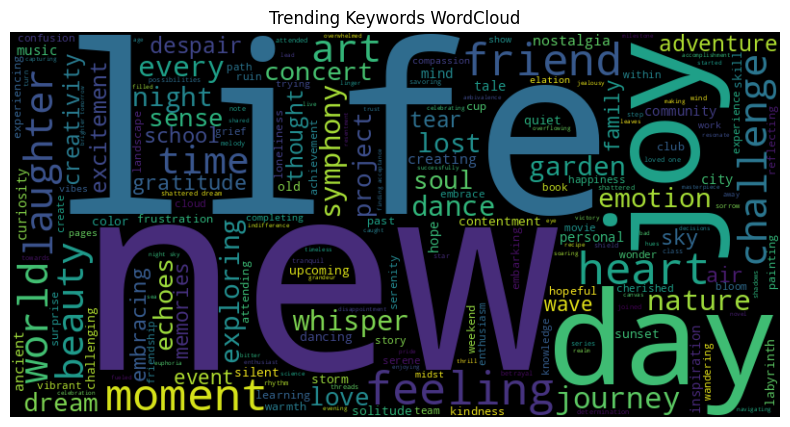

In [13]:

# Word Cloud of Trending Topics
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trending Keywords WordCloud')
plt.show()


In [14]:
#  Export for Dashboarding
df[[text_column_name, 'sentiment_score', 'sentiment']].to_csv('sentiment_analysis_output.csv', index=False)
common_words_df.to_csv('trending_keywords.csv', index=False)